<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/Computer_vision_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is for solving some computer vision problems using CNN and tensorflow. We will use the first problem and the dataset will be imported using zipfile 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
!pwd
ROOT = "/content/drive/MyDrive/Tensorflow certifications work"
os.chdir(ROOT)
!pwd

/content/drive/My Drive/Tensorflow certifications work
/content/drive/MyDrive/Tensorflow certifications work


### Here we are using classification for Pizza and steak.

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-14 06:23:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.214.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  51.8MB/s    in 2.0s    

2022-09-14 06:23:08 (51.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



### Let's look into the directory structure downloaded

In [10]:
for dir_path, dir_name, file_name in os.walk("pizza_steak"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in directory : {dir_path} ")

There are 2 directories and 0 files in directory : pizza_steak 
There are 2 directories and 0 files in directory : pizza_steak/test 
There are 0 directories and 250 files in directory : pizza_steak/test/steak 
There are 0 directories and 250 files in directory : pizza_steak/test/pizza 
There are 2 directories and 0 files in directory : pizza_steak/train 
There are 0 directories and 750 files in directory : pizza_steak/train/steak 
There are 0 directories and 750 files in directory : pizza_steak/train/pizza 


### Let's visualize our dataset now

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  ## Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  ## reading the image using matplotlib
  img = mpimage.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") ## show the shape of image

  return img



['2163079.jpg']
Image shape: (512, 384, 3)


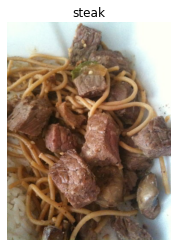

In [13]:
## viewing random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [14]:
import tensorflow as tf
tf.constant(img) ## this is the mathematical representation of our image

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[245, 255, 247],
        [245, 255, 247],
        [245, 255, 247],
        ...,
        [254, 255, 247],
        [254, 255, 247],
        [254, 255, 247]],

       [[245, 255, 247],
        [245, 255, 247],
        [245, 255, 247],
        ...,
        [254, 255, 247],
        [254, 255, 247],
        [254, 255, 247]],

       [[245, 255, 247],
        [245, 255, 247],
        [245, 255, 247],
        ...,
        [254, 255, 247],
        [254, 255, 247],
        [254, 255, 247]],

       ...,

       [[164, 157, 129],
        [159, 154, 125],
        [155, 149, 123],
        ...,
        [240, 252, 250],
        [242, 253, 249],
        [245, 254, 251]],

       [[171, 160, 142],
        [163, 155, 136],
        [156, 148, 129],
        ...,
        [241, 253, 251],
        [243, 254, 250],
        [244, 253, 250]],

       [[166, 154, 140],
        [160, 148, 134],
        [152, 143, 128],
        ...,
        [242, 254, 25

### Many machine learning algorithms including NN prefer to get data between 0 and 1. Knowing this one of the most common techniques to do so with images is to divide the image shape by 255 as 255 is the maximum pixel value.

In [7]:
img/255.0

array([[[0.05882353, 0.05882353, 0.02745098],
        [0.04313725, 0.04313725, 0.01176471],
        [0.03137255, 0.03137255, 0.        ],
        ...,
        [0.06666667, 0.01176471, 0.        ],
        [0.06666667, 0.01176471, 0.        ],
        [0.0627451 , 0.00784314, 0.        ]],

       [[0.03137255, 0.03137255, 0.        ],
        [0.02745098, 0.02745098, 0.        ],
        [0.03529412, 0.03529412, 0.00392157],
        ...,
        [0.06666667, 0.00784314, 0.        ],
        [0.05882353, 0.00392157, 0.        ],
        [0.05882353, 0.00392157, 0.        ]],

       [[0.01176471, 0.01176471, 0.        ],
        [0.01960784, 0.01960784, 0.        ],
        [0.03921569, 0.03921569, 0.00784314],
        ...,
        [0.06666667, 0.00784314, 0.        ],
        [0.05882353, 0.00392157, 0.        ],
        [0.05882353, 0.00392157, 0.        ]],

       ...,

       [[0.88235294, 0.87058824, 0.84313725],
        [0.88235294, 0.87058824, 0.84313725],
        [0.88235294, 0

## An end to end example

### Here we will build an CNN model with following steps
**Load our images**

**Preprocess our images**


**Compile our CNN**

**Fit the CNN to training data**

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## setting the seed
tf.random.set_seed(42)

## preprocess the data ( get all the pixel values between 0 and 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)   ## this is real time data augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

## setup paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

## import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               shuffle=True,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

## Build a CNN model same as Tiny VGG on the CNN explainer website

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

## compile our cnn model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

## fit the model
history_1 = model_1.fit(train_data, epochs = 5,steps_per_epoch = len(train_data),validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 506s 11s/step - loss: 0.6081 - mae: 0.4235 - val_loss: 0.4139 - val_mae: 0.3005
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.4169 - mae: 0.2731 - val_loss: 0.3490 - val_mae: 0.2428
Epoch 3/5
47/47 [==============================] - 107s 2s/step - loss: 0.3857 - mae: 0.2460 - val_loss: 0.3089 - val_mae: 0.2174
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.3451 - mae: 0.2198 - val_loss: 0.3071 - val_mae: 0.2053
Epoch 5/5
47/47 [==============================] - 101s 2s/step - loss: 0.3080 - mae: 0.2005 - val_loss: 0.3366 - val_mae: 0.2209


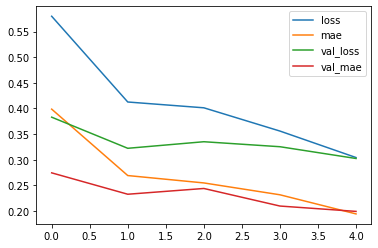

In [18]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

### Let's create a non CNN model and try to run with our image dataset

In [11]:
## Set random seed
tf.random.set_seed(42)

## creating model to replicate the tensorflow pklayground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

## fit the model

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 388ms/step - loss: 1.0643 - mae: 0.5064 - val_loss: 0.6932 - val_mae: 0.5000
Epoch 2/5
47/47 [==============================] - 18s 380ms/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6932 - val_mae: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 347ms/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6932 - val_mae: 0.5000
Epoch 4/5
47/47 [==============================] - 26s 553ms/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6932 - val_mae: 0.5000
Epoch 5/5
47/47 [==============================] - 17s 355ms/step - loss: 0.6932 - mae: 0.5000 - val_loss: 0.6932 - val_mae: 0.5000


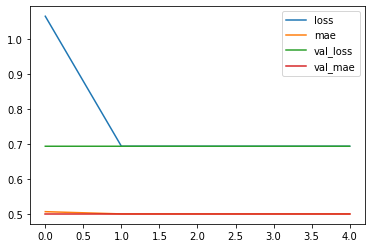

In [13]:
import pandas as pd
pd.DataFrame(history_2.history).plot()